***This is some really messy code. But this gets the job done.***

In [1]:
import pandas as pd
import os
import glob
import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
labels = {
    'go': 0,
    'stop': 1,
    'stopLeft': 2,
    'goLeft': 3,
    'warning': 4,
    'warningLeft': 5
}

In [4]:
root_folder_names = ['dayTrain', 'nightTrain']
root_folder_name_mapper = {
    'dayTrain': 'dayClip',
    'nightTrain': 'nightClip'
}

annotation_root = '../../input/lisa_traffic_light_dataset/lisa-traffic-light-dataset/Annotations/Annotations'
image_root = '../../input/lisa_traffic_light_dataset/lisa-traffic-light-dataset'

In [3]:
def get_coords(tag, x_min, y_min, x_max, y_max):
        """
        We will return the 0 for stop, 1 for green.
        Also we will return normalized x_center, y_center, 
        width, and height. We will divice the x_center and width by 
        image width and y_center and height by image height to
        normalize. Each image is 1280 in width and 960 in height. 
        """
        if tag in labels:
            if tag == 'go':
                label = labels['go']
                color = (0, 255, 0)
            elif tag == 'stop':
                label = labels['stop']
                color = (0, 0, 255)
            elif tag == 'stopLeft':
                label = labels['stopLeft']
                color = (0, 0, 155)
            elif tag == 'goLeft':
                label = labels['goLeft']
                color = (0, 200, 200)
            elif tag == 'warning':
                label = labels['warning']
                color = (29, 118, 255)
            elif tag == 'warningLeft':
                label = labels['warningLeft']
                color = (0 , 118, 255)

            return label, x_min, y_min, x_max, y_max, color
        else:
            label = ''
            x_min = ''
            y_min = ''
            x_max = ''
            y_max = ''
            color = 0
            return label, x_min, y_min, x_max, y_max, color

13
dayClip1


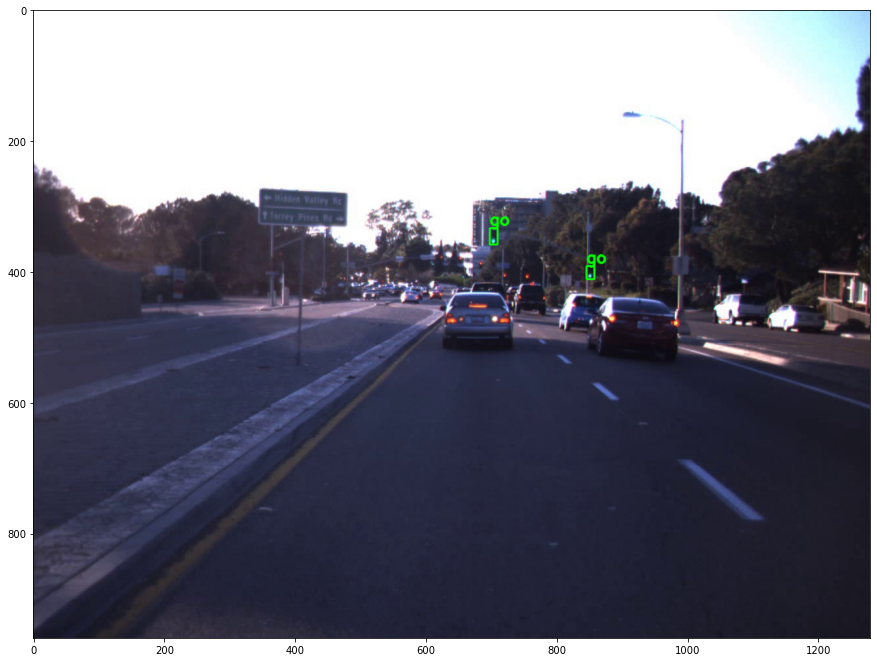

dayClip2


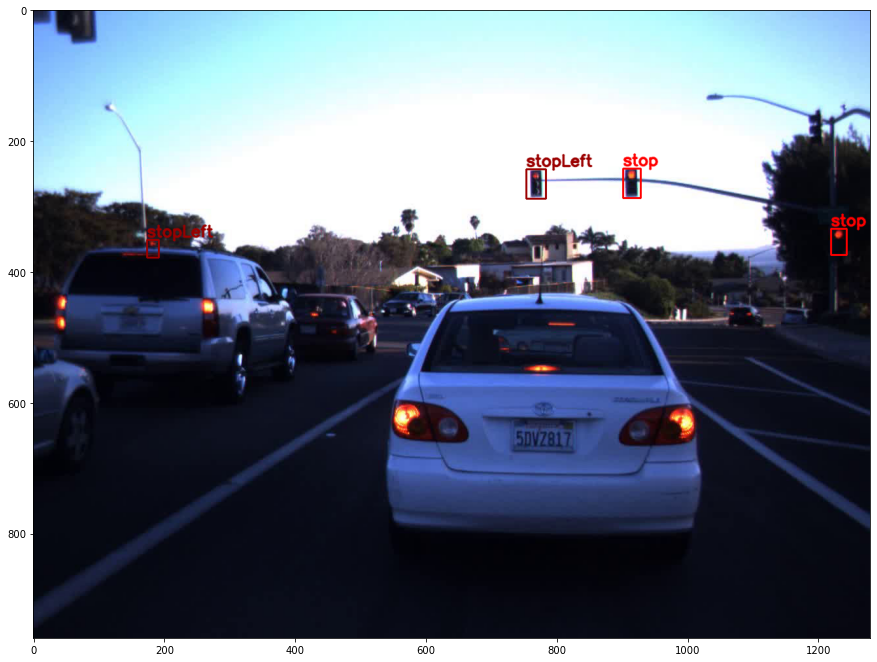

dayClip3


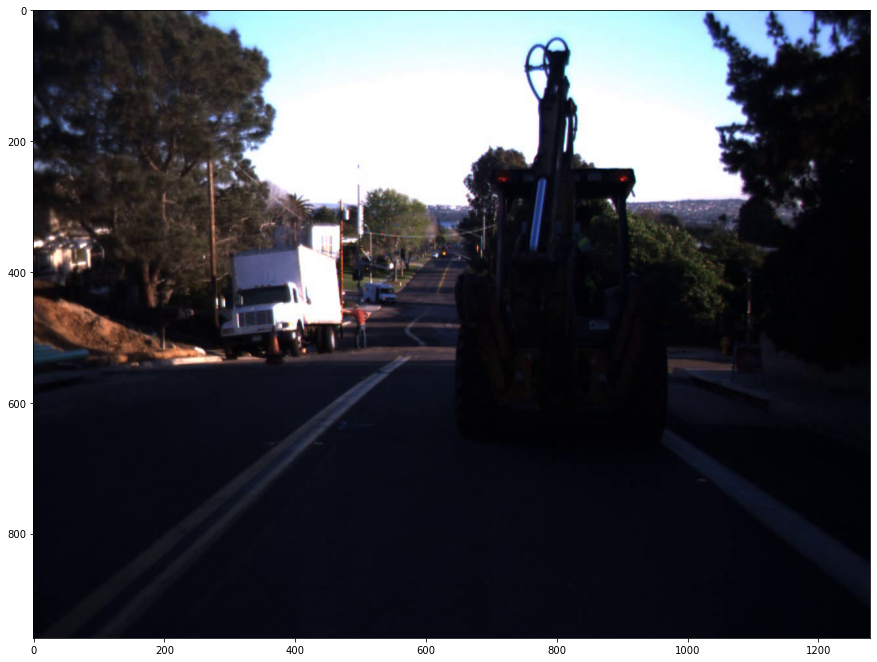

dayClip4


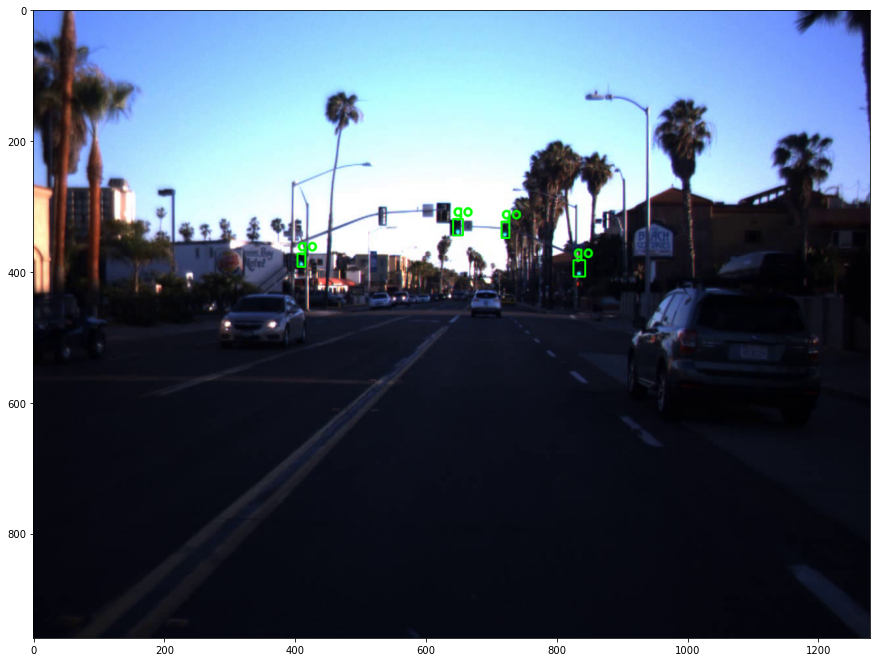

dayClip5


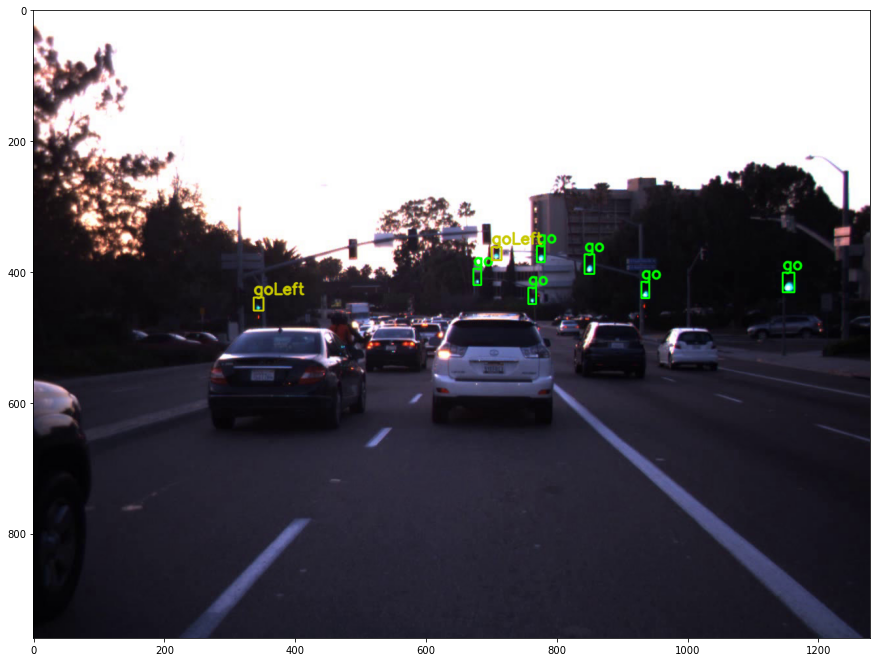

dayClip6


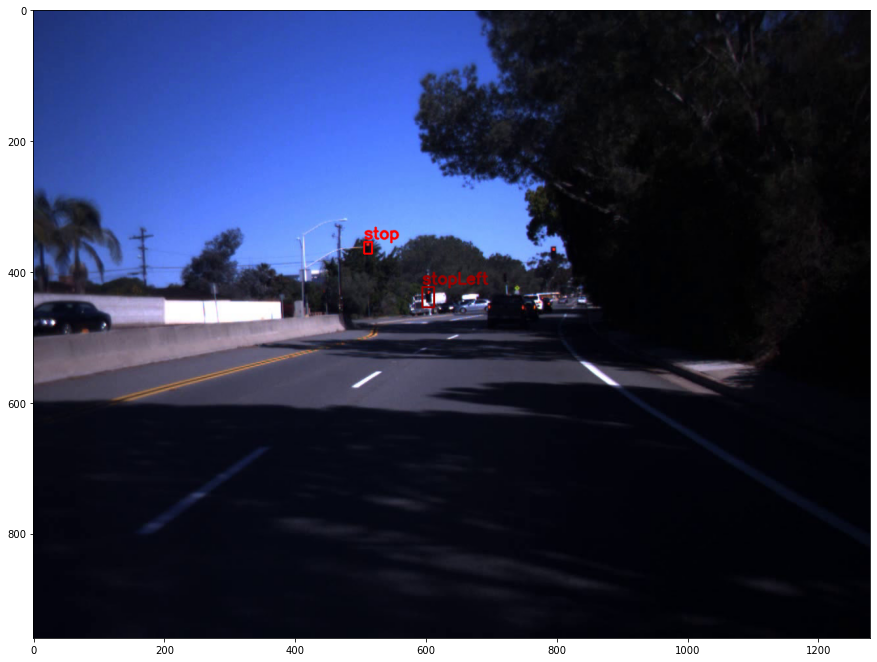

dayClip7


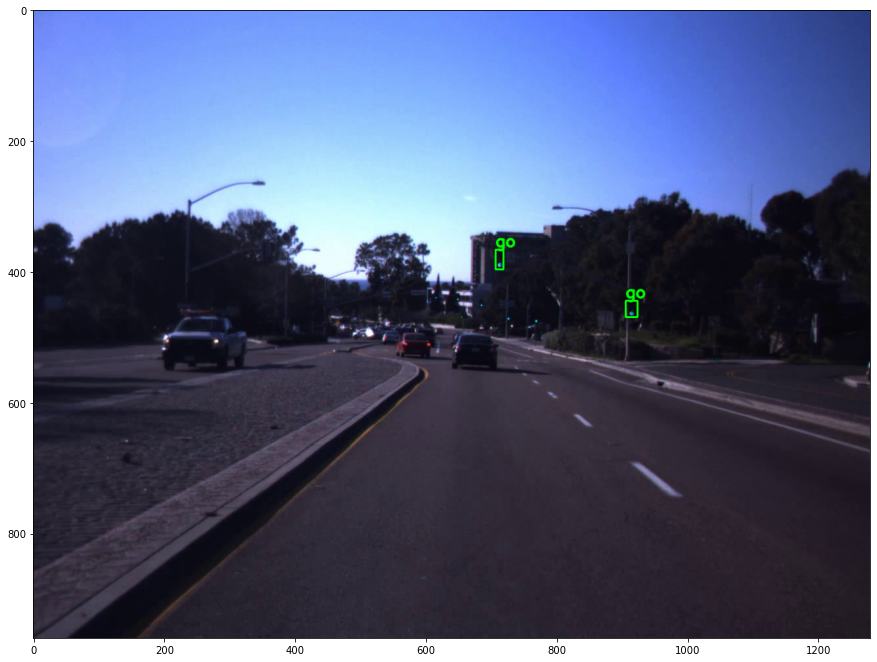

dayClip8


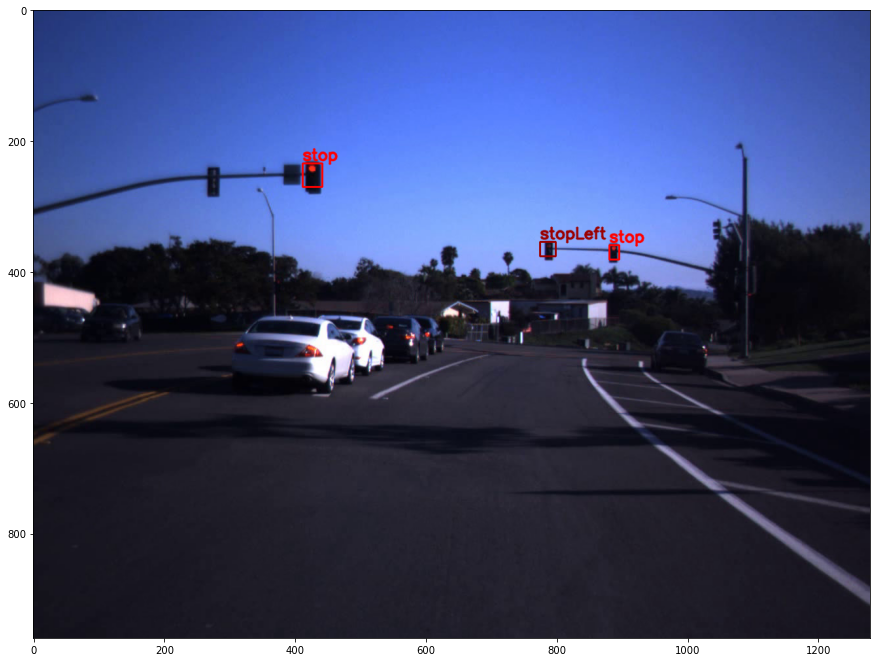

dayClip9


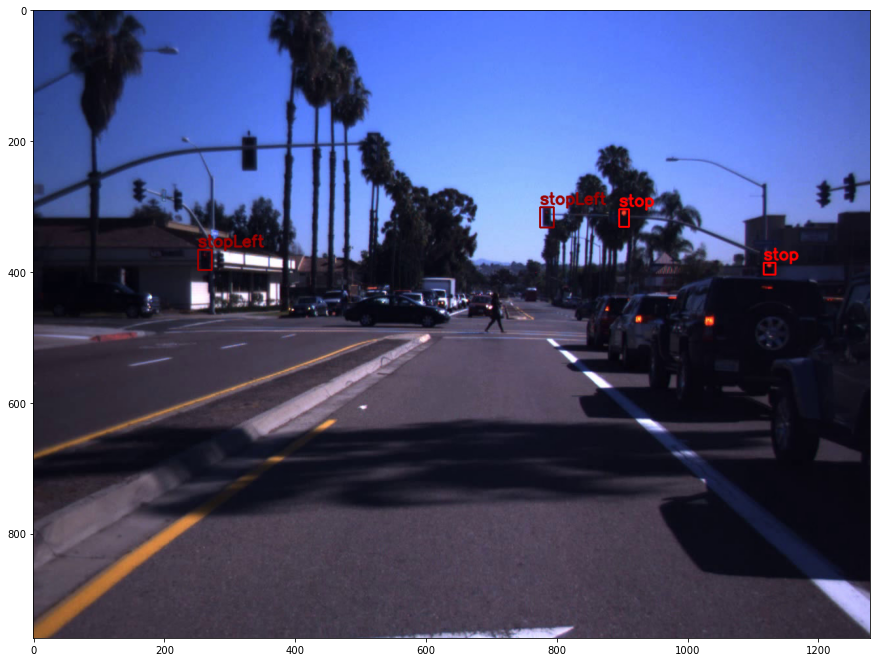

dayClip10


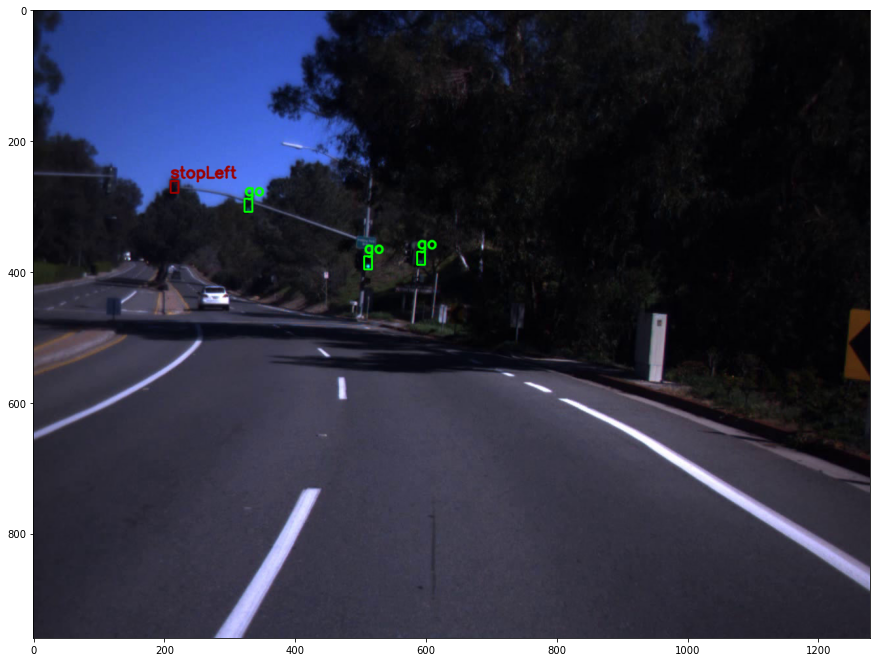

dayClip11


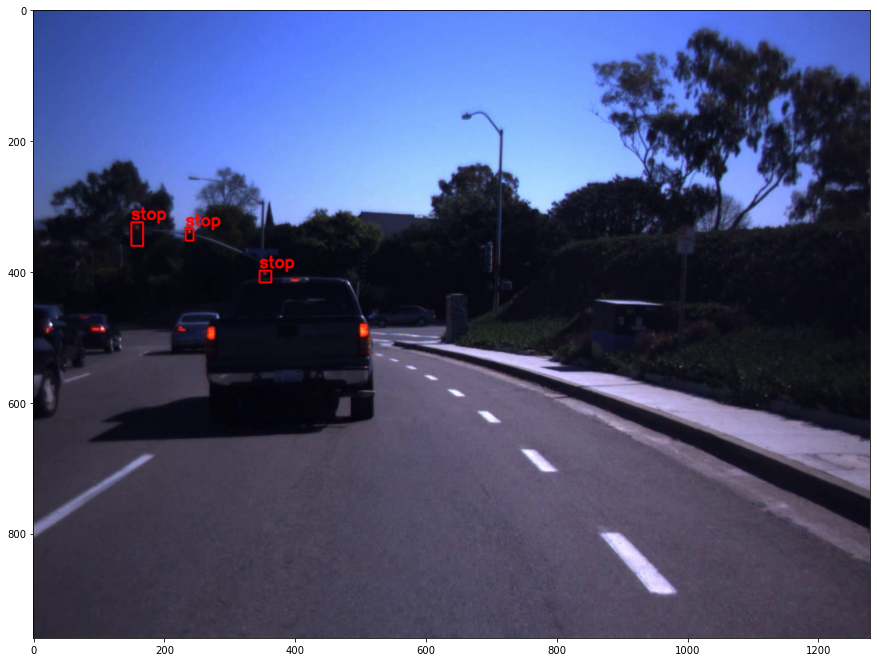

dayClip12


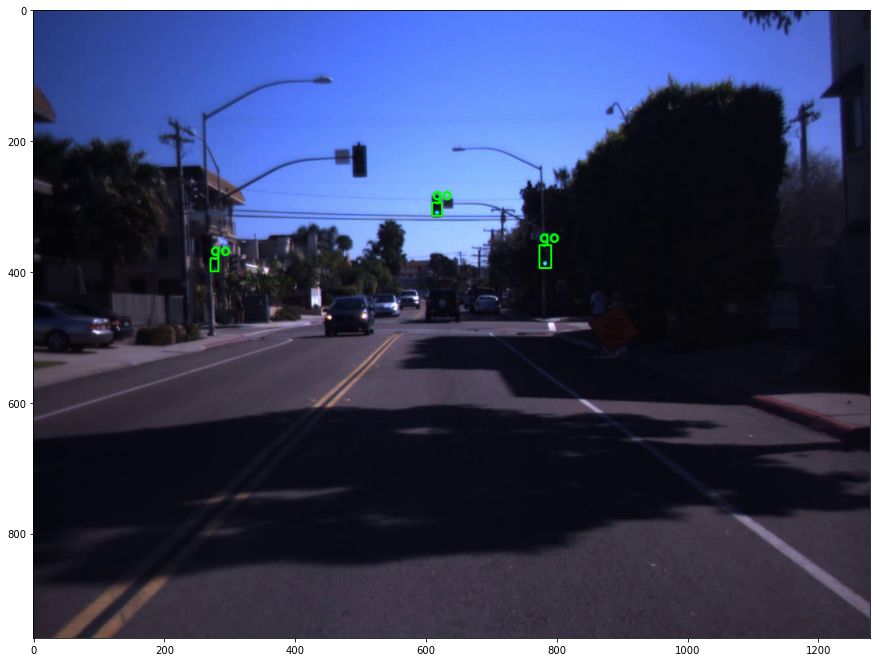

dayClip13


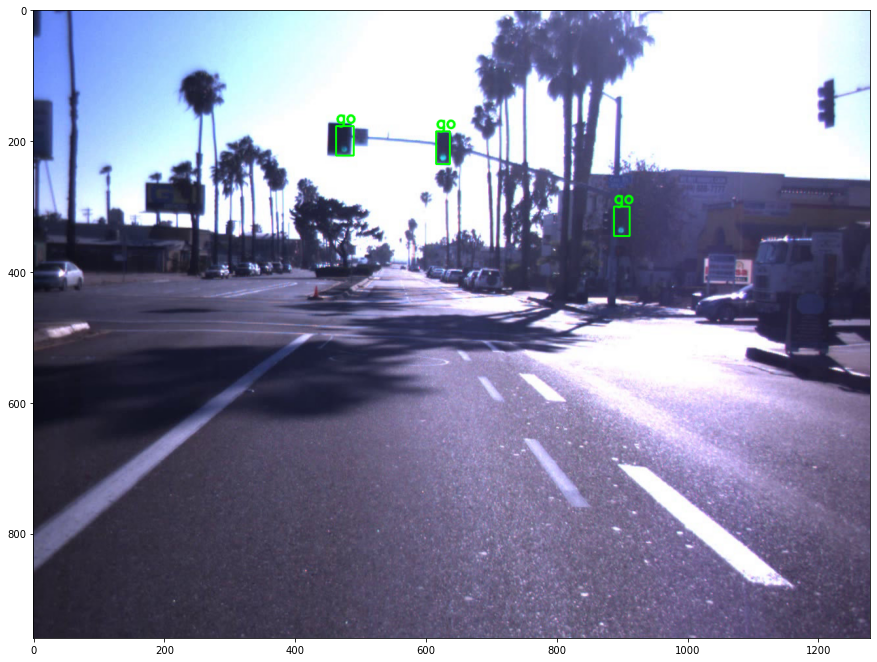

5
nightClip1


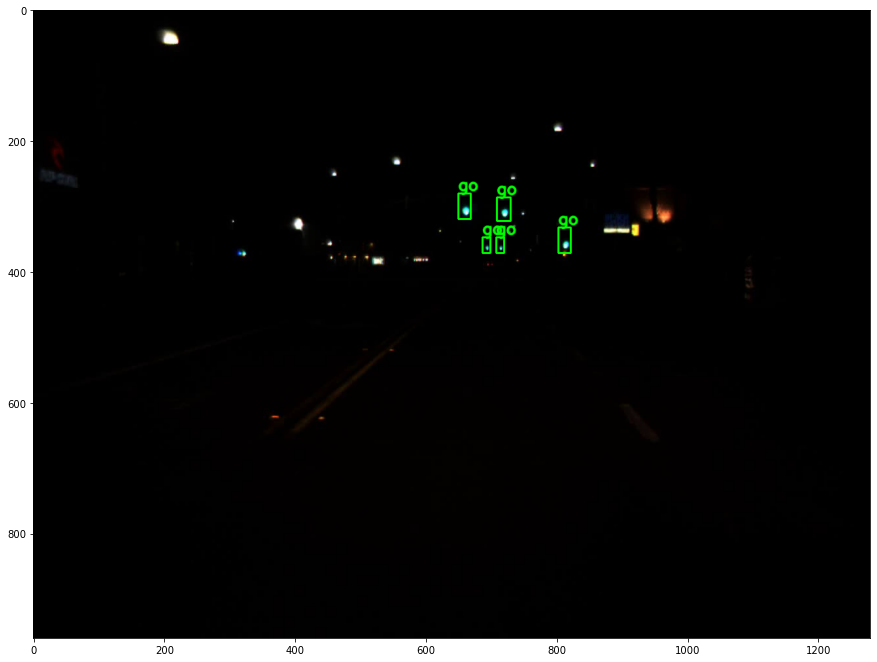

nightClip2


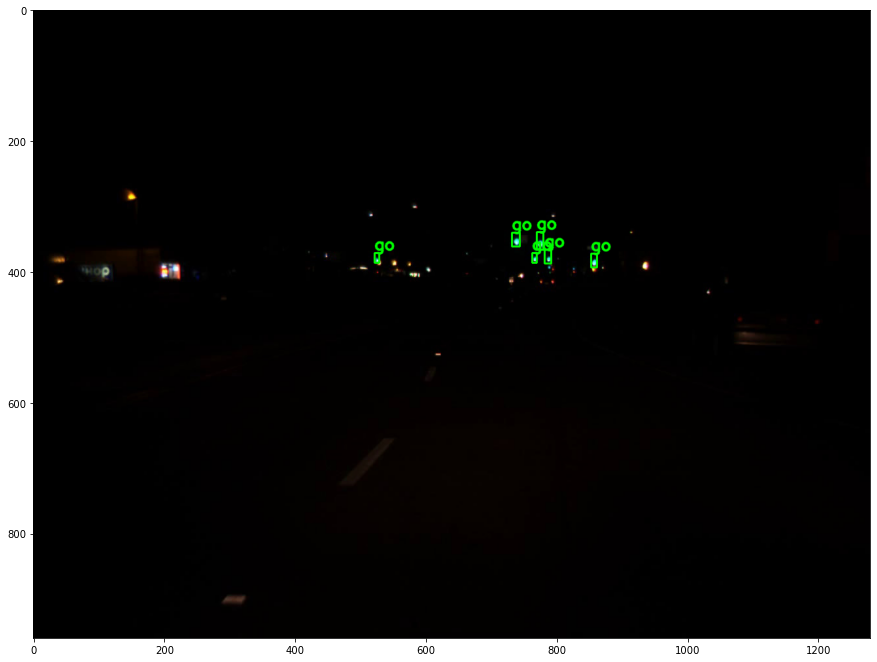

nightClip3


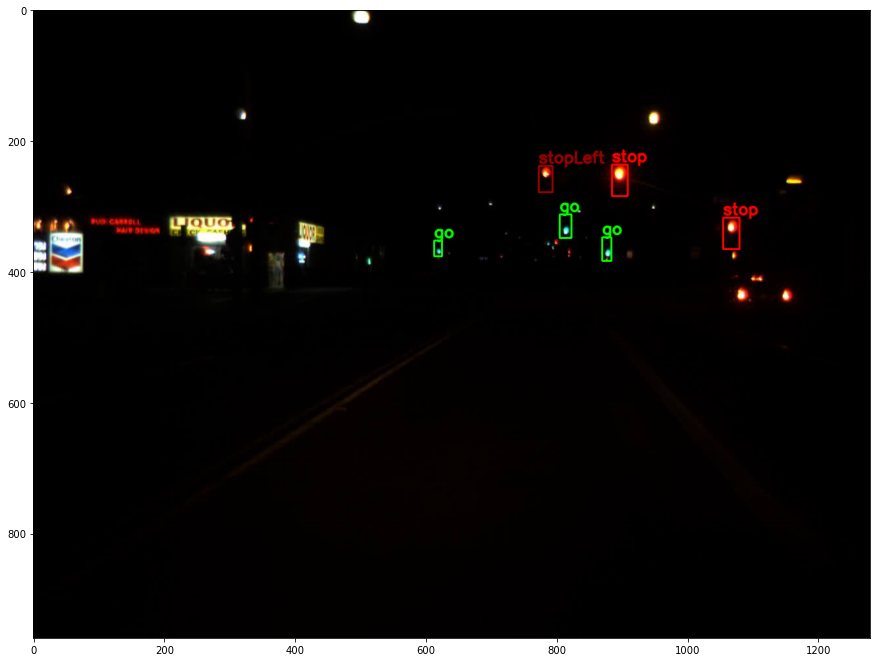

nightClip4


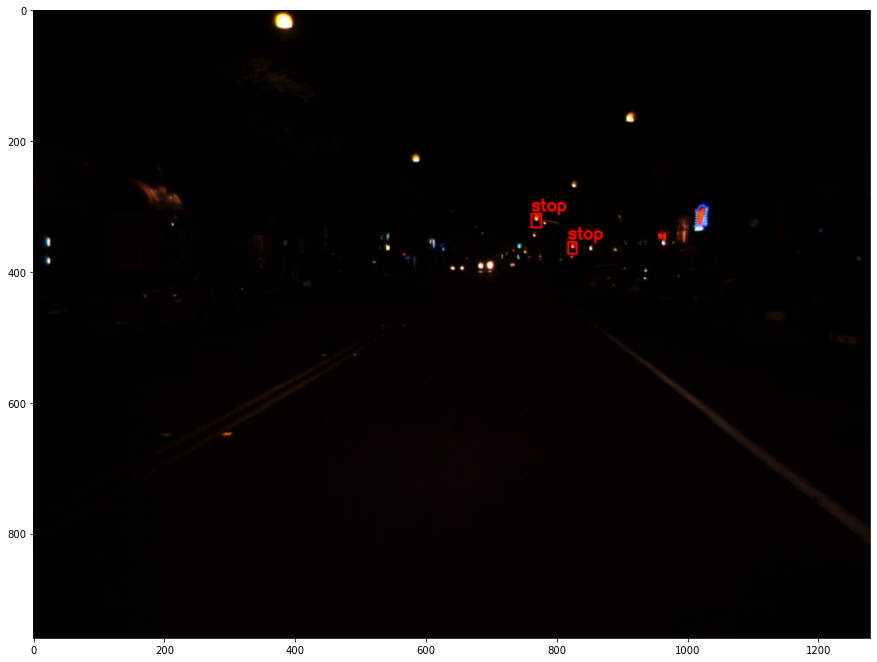

nightClip5


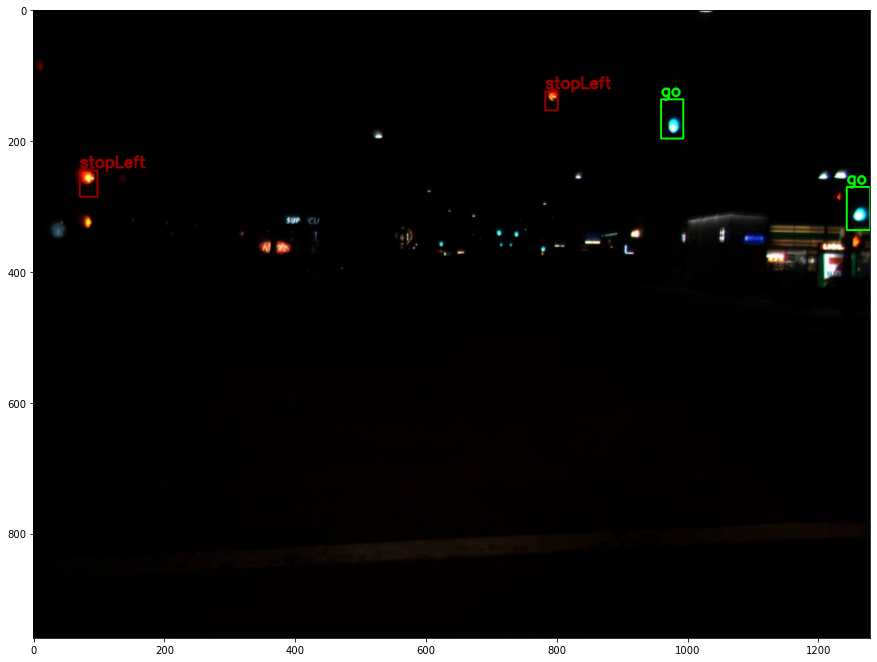

In [5]:
for root_folder_name in root_folder_names:
    folder_names = os.listdir(f"{annotation_root}/{root_folder_name}")
    num_folders = len(folder_names)
    print(num_folders)
    mapped_clip = root_folder_name_mapper[root_folder_name]
    
    for i in range(1, num_folders+1):
        print(f"{mapped_clip}{i}")
        df = pd.read_csv(f"{annotation_root}/{root_folder_name}/{mapped_clip}{i}/frameAnnotationsBOX.csv", 
    delimiter=';')
        image_paths = glob.glob(f"{image_root}/{root_folder_name}/{root_folder_name}/{mapped_clip}{i}/frames/*.jpg")
        image_paths.sort()

        # extract all tags, 'go==0' or 'stop==1'
        # 'stopLeft==2', 'goLeft==3', 'warning==4', 'warningLeft==5'
        tags = df['Annotation tag'].values
        x_min = df['Upper left corner X'].values
        y_min = df['Upper left corner Y'].values
        x_max = df['Lower right corner X'].values
        y_max = df['Lower right corner Y'].values


        file_counter = 0 # to counter through CSV file
        # iterate through all image paths
        for image_path in (image_paths):
            image_name = image_path.split(os.path.sep)[-1]
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            # iterate through all CSV rows
            for j in range(len(df)):
                if file_counter < len(df):
                    file_name = df.loc[file_counter]['Filename'].split('/')[-1]
                    if file_name == image_name:
                        label, x1, y1, x2, y2, color = get_coords(tags[file_counter], 
                                                    x_min[file_counter],
                                                    y_min[file_counter],
                                                    x_max[file_counter],
                                                    y_max[file_counter])
                        if type(label) == int:
                            cv2.rectangle(image, (x1, y1), (x2, y2), 
                                          color, 2)
                            cv2.putText(image, tags[file_counter], (x1, y1-5),
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2, 
                                        lineType=cv2.LINE_AA)
                        else: 
                            continue
                    file_counter += 1
                    if file_name != image_name:
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                        plt.figure(figsize=(15, 12))
                        plt.imshow(image)
                        plt.show()
                        plt.close()
                        break
            break